In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)
i = 0
while(cap.isOpened()):
    _,frame = cap.read()
    roi = frame[100:350,100:350]
    roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
    #gray = cv2.GaussianBlur(gray,(7,7),0)
    #hist = cv2.equalizeHist(gray)
    #edge = cv2.Canny(gray,25,255)
    roi = cv2.resize(roi,(28,28))
    cv2.imwrite("gesture_data/train/one/"+str(i)+".jpg",roi)
    #contour,_ = cv2.findContours(edge.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    #cnt = max(contour, key= lambda x: cv2.contourArea(x))
    
    #print(len(contour))
    cv2.rectangle(frame,(100,100),(350,350),(255,0,0),3)
    cv2.imshow("frame",frame)
    #cv2.imshow("edge",edge)
    #cv2.drawContours(b_f,contour,-1,(0,255,0),3)
    #cv2.imshow("b_f",b_f)
    
    cv2.imshow("roi",roi)
    if cv2.waitKey(1) & 0XFF == ord("q"):
        break
    if i>2000:
        break
    i = i+1
cap.release()
cv2.destroyAllWindows()
    
        
        

import cv2
import numpy as np

cap = cv2.VideoCapture(0)
i = 0
while(cap.isOpened()):
    _,frame = cap.read()
    roi = frame[100:350,100:350]
    roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
    #gray = cv2.GaussianBlur(gray,(7,7),0)
    #hist = cv2.equalizeHist(gray)
    #edge = cv2.Canny(gray,25,255)
    roi = cv2.resize(roi,(28,28))
    cv2.imwrite("gesture_data/valid/five/"+str(i)+".jpg",roi)
    #contour,_ = cv2.findContours(edge.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    #cnt = max(contour, key= lambda x: cv2.contourArea(x))
    
    #print(len(contour))
    cv2.rectangle(frame,(100,100),(350,350),(255,0,0),3)
    cv2.imshow("frame",frame)
    #cv2.imshow("edge",edge)
    #cv2.drawContours(b_f,contour,-1,(0,255,0),3)
    #cv2.imshow("b_f",b_f)
    
    cv2.imshow("roi",roi)
    if cv2.waitKey(1) & 0XFF == ord("q"):
        break
    if i>200:
        break
    i = i+1
cap.release()
cv2.destroyAllWindows()
    
        
        

In [33]:
import keras 
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
import os
from os import listdir
from os.path import isdir
from numpy import asarray
import cv2
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [51]:
s = 150
m = Sequential()
m.add(Conv2D(32,kernel_size=(3,3),activation="linear",input_shape=(s,s,1),padding="same"))
m.add(BatchNormalization(axis=-1))
m.add(LeakyReLU(alpha=0.1))
m.add(MaxPooling2D((2,2),padding="same"))
m.add(Dropout(0.3))

m.add(Conv2D(64,kernel_size=(3,3),activation="linear",padding="same"))
m.add(BatchNormalization(axis=-1))
m.add(LeakyReLU(alpha=0.1))
m.add(MaxPooling2D((2,2),padding="same"))
m.add(Dropout(0.3))

m.add(Conv2D(128,kernel_size=(3,3),activation="linear",padding="same"))
m.add(BatchNormalization(axis=-1))
m.add(LeakyReLU(alpha=0.1))
m.add(MaxPooling2D((2,2),padding="same"))
m.add(Dropout(0.4))

m.add(Flatten())
m.add(Dense(120,activation="linear"))
m.add(BatchNormalization(axis=-1))
m.add(LeakyReLU(alpha=0.1))
m.add(Dropout(0.3))

m.add(Dense(60,activation="linear"))
m.add(BatchNormalization(axis=-1))
m.add(LeakyReLU(alpha=0.1))
m.add(Dropout(0.2))

m.add(Dense(30, activation="linear"))
m.add(BatchNormalization(axis=-1))
m.add(LeakyReLU(alpha=0.1))
m.add(Dropout(0.1))

m.add(Dense(10,activation="softmax"))

In [52]:
m.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization_13 (Batc (None, 150, 150, 32)      128       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
batch_normalization_14 (Batc (None, 75, 75, 64)       

In [53]:
m.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=["accuracy"])

In [37]:
l = dict()
r_l = dict()
c = 0
for j in listdir("leapGestRecog/00/"):
    if not j.startswith("."):
        l[j] = c
        r_l[c] = j
        c = c+1
print(l)
    

{'01_palm': 0, '02_l': 1, '03_fist': 2, '04_fist_moved': 3, '05_thumb': 4, '06_index': 5, '07_ok': 6, '08_palm_moved': 7, '09_c': 8, '10_down': 9}


In [38]:
X = []
Y = []
ori_path = "leapGestRecog/0"
d_c = 0
for i in range(0,10):
    for j in listdir(ori_path+str(i)+'/'):
        if not j.startswith("."):
            v = 0
            for k in listdir(ori_path+str(i)+'/'+j+'/'):
                path = ori_path+str(i)+'/'+j+'/'+k
                #print(path)
                img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img,(s,s))
                arr = np.array(img)
                X.append(arr)
                v = v + 1
                
            y = np.full((v,1), l[j])
            Y.append(y)
            d_c = d_c + v
        print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j",j)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 01_palm
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 02_l
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 03_fist
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 04_fist_moved
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 05_thumb
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 06_index
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 07_ok
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 08_palm_moved
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 09_c
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 10_down
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 01_palm
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 02_l
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 03_fist
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 04_fist_moved
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 05_thumb
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 06_index
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 07_ok
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 08_palm_moved
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 09_c
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 10_down
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 01_palm
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 02_l
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 03_fist
>>>>>>>>>>>>>>>>>>>>>>>>>

In [40]:
X = np.array(X, dtype= "float32")
Y = np.array(Y)
Y = Y.reshape(d_c,1)
print(X.shape)
print(Y.shape)


(20000, 150, 150)
(20000, 1)


In [41]:
Y

array([[0],
       [0],
       [0],
       ...,
       [9],
       [9],
       [9]])

[5]


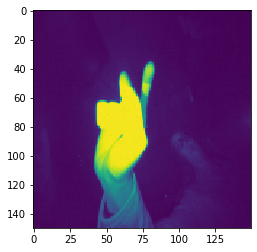

[0]


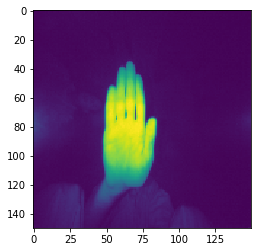

[5]


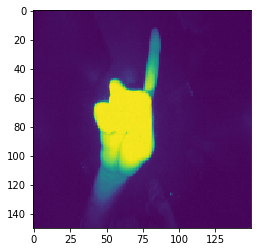

[5]


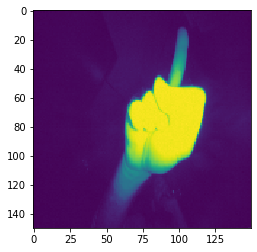

[0]


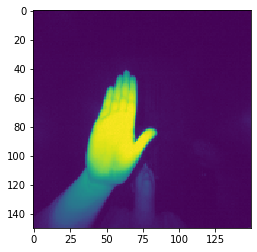

[5]


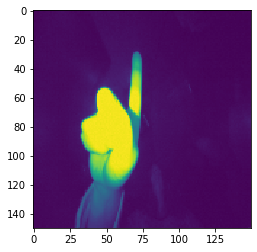

[5]


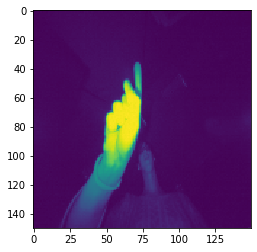

[0]


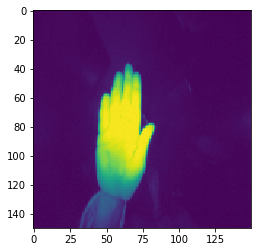

In [42]:
q = [1000,2000,13000,13001,10000,15000,19000,14000]
for i in q:
    plt.imshow(X[i])
    print(Y[i])
    plt.show()

In [43]:
Y = to_categorical(Y)
X = X.reshape((d_c,s,s,1))
X = X/255
print(X.shape)
print(Y.shape)

(20000, 150, 150, 1)
(20000, 10)


In [47]:
x_train,  x_test, y_trin, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [50]:
print(x_train.shape)
print(x_test.shape)
print(y_trin.shape)
print(y_test.shape)

(15000, 150, 150, 1)
(5000, 150, 150, 1)
(15000, 10)
(5000, 10)


In [55]:
his = m.fit(x_train,y_trin,epochs=15, batch_size=128, verbose=1, validation_data=(x_test,y_test))

Train on 15000 samples, validate on 5000 samples
Epoch 1/15
15000/15000 [==============================] - 73s 5ms/step - loss: 1.0262 - accuracy: 0.7437 - val_loss: 3.7320 - val_accuracy: 0.1188
Epoch 2/15
15000/15000 [==============================] - 53s 4ms/step - loss: 0.2112 - accuracy: 0.9815 - val_loss: 4.6114 - val_accuracy: 0.1016
Epoch 3/15
15000/15000 [==============================] - 53s 4ms/step - loss: 0.0859 - accuracy: 0.9937 - val_loss: 4.0929 - val_accuracy: 0.2766
Epoch 4/15
15000/15000 [==============================] - 53s 4ms/step - loss: 0.0468 - accuracy: 0.9971 - val_loss: 4.0223 - val_accuracy: 0.2406
Epoch 5/15
15000/15000 [==============================] - 53s 4ms/step - loss: 0.0297 - accuracy: 0.9983 - val_loss: 3.0405 - val_accuracy: 0.4010
Epoch 6/15
15000/15000 [==============================] - 53s 4ms/step - loss: 0.0235 - accuracy: 0.9980 - val_loss: 1.0339 - val_accuracy: 0.6382
Epoch 7/15
15000/15000 [==============================] - 53s 4ms/ste

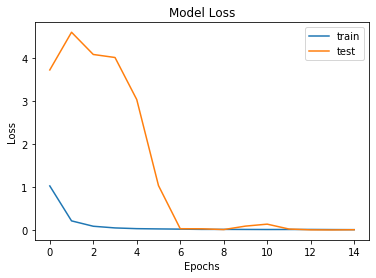

In [56]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

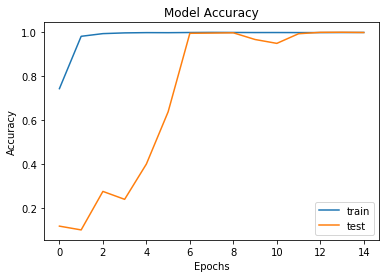

In [59]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [62]:
score = m.evaluate(x_test,y_test)
print(">>>>>>Test loss",score[0])
print(">>>>>>Test accuracy",score[1])

5000/5000 [==============================] - 6s 1ms/step
>>>>>>Test loss 0.004428002888709307
>>>>>>Test accuracy 0.9987999796867371


In [63]:
m.save("hand_gesture_model.h5")

In [102]:
prediction = m.predict(x_test)
#y_pred = np.argmax(prediction)
#print(prediction)
#print(y_pred)
print(np.argmax(prediction[400]), y_test[400])

3 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [2]:
import numpy as np
import cv2
from keras import models as m
import os
from os import listdir
from os.path import isdir
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
m = m.load_model("hand_gesture_model.h5")

In [4]:
s = 150
l = dict()
r_l = dict()
c = 0
for j in listdir("leapGestRecog/00/"):
    if not j.startswith("."):
        l[j] = c
        r_l[c] = j
        c = c+1
print(l)
    

{'01_palm': 0, '02_l': 1, '03_fist': 2, '04_fist_moved': 3, '05_thumb': 4, '06_index': 5, '07_ok': 6, '08_palm_moved': 7, '09_c': 8, '10_down': 9}


In [5]:
X = []
Y = []
ori_path = "leapGestRecog/0"
d_c = 0
for i in range(0,10):
    for j in listdir(ori_path+str(i)+'/'):
        if not j.startswith("."):
            v = 0
            for k in listdir(ori_path+str(i)+'/'+j+'/'):
                path = ori_path+str(i)+'/'+j+'/'+k
                #print(path)
                img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img,(s,s))
                arr = np.array(img)
                X.append(arr)
                v = v + 1
                
            y = np.full((v,1), l[j])
            Y.append(y)
            d_c = d_c + v
        print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j",j)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 01_palm
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 02_l
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 03_fist
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 04_fist_moved
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 05_thumb
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 06_index
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 07_ok
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 08_palm_moved
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 09_c
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 10_down
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 01_palm
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 02_l
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 03_fist
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 04_fist_moved
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 05_thumb
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 06_index
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 07_ok
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 08_palm_moved
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 09_c
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 10_down
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 01_palm
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 02_l
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>j 03_fist
>>>>>>>>>>>>>>>>>>>>>>>>>

In [6]:
X = np.array(X, dtype= "float32")
Y = np.array(Y)
Y = Y.reshape(d_c,1)
print(X.shape)
print(Y.shape)
Y = to_categorical(Y)
X = X.reshape((d_c,s,s,1))
X = X/255
print(X.shape)
print(Y.shape)

(20000, 150, 150)
(20000, 1)
(20000, 150, 150, 1)
(20000, 10)


In [7]:
x_train,  x_test, y_trin, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [8]:
prediction = m.predict(x_test)
#y_pred = np.argmax(prediction)
#print(prediction)
#print(y_pred)
print(np.argmax(prediction[400]), y_test[400])

3 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [9]:
score = m.evaluate(x_test,y_test)
print(">>>>>>Test loss",score[0])
print(">>>>>>Test accuracy",score[1])

5000/5000 [==============================] - 6s 1ms/step
>>>>>>Test loss 0.004428011173382401
>>>>>>Test accuracy 0.9987999796867371


In [10]:
def index(p):
    for i,w in enumerate(p):
        if w == 1:
            return i

>>>>>>>>q 0
>>>>>>>>p 0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>>>>>>>>q 3
>>>>>>>>p 3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
>>>>>>>>q 5
>>>>>>>>p 5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
>>>>>>>>q 9
>>>>>>>>p 9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
>>>>>>>>q 9
>>>>>>>>p 9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
>>>>>>>>q 5
>>>>>>>>p 5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
>>>>>>>>q 5
>>>>>>>>p 5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
>>>>>>>>q 8
>>>>>>>>p 8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
>>>>>>>>q 0
>>>>>>>>p 0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


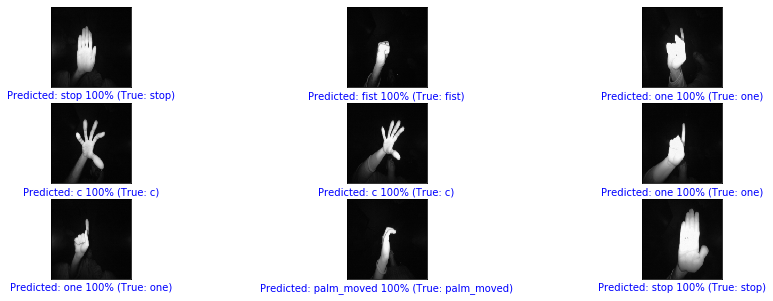

In [11]:
class_names = ["stop", "palm", "l", "fist", "fist_moved", "one", "index", "ok", "palm_moved", "c"] 
plt.figure(figsize=(15,5))
prediction = m.predict(x_test)
for i in range(1,10):
    true_label = y_test[i]
    img = x_test[i]
    img = cv2.cvtColor(x_test[i],cv2.COLOR_GRAY2RGB)
    predicted_label = np.argmax(prediction[i])
    q = index(true_label)
    
    plt.subplot(3,3,i)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    if predicted_label == q:
        color = "blue"
    else:
        color = "red"
    
    plt.xlabel("Predicted: {} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                                         100*np.max(prediction),
                                                         class_names[q]),color=color)
    print(">>>>>>>>q",q)
    print(">>>>>>>>p",predicted_label)
    print(true_label)
    

>>>>>>>>q 0
>>>>>>>>p 0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>>>>>>>>q 3
>>>>>>>>p 3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
>>>>>>>>q 5
>>>>>>>>p 5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
>>>>>>>>q 9
>>>>>>>>p 9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
>>>>>>>>q 9
>>>>>>>>p 9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
>>>>>>>>q 5
>>>>>>>>p 5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
>>>>>>>>q 5
>>>>>>>>p 5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
>>>>>>>>q 8
>>>>>>>>p 8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
>>>>>>>>q 0
>>>>>>>>p 0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
>>>>>>>>q 7
>>>>>>>>p 7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
>>>>>>>>q 9
>>>>>>>>p 9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
>>>>>>>>q 2
>>>>>>>>p 2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
>>>>>>>>q 1
>>>>>>>>p 1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
>>>>>>>>q 2
>>>>>>>>p 2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
>>>>>>>>q 6
>>>>>>>>p 6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
>>>>>>>>q 6
>>>>>>>>p 6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
>>>>>>>>q 3
>>>>>>>>p 3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
>>>>>>>>q 0
>>>>>>>>p 0
[1. 0. 0. 0. 0. 0. 0. 0.

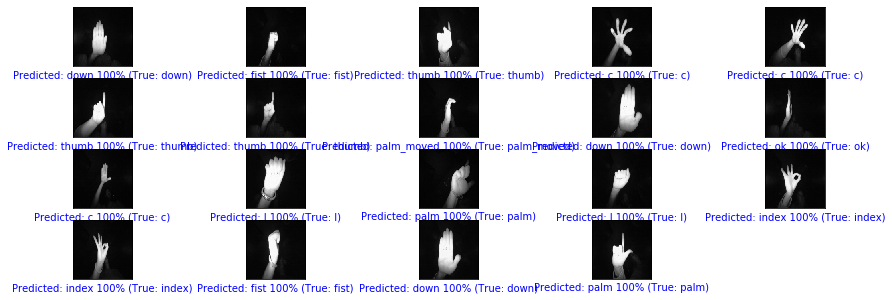

In [12]:
class_names = ["down", "palm", "l", "fist", "fist_moved", "thumb", "index", "ok", "palm_moved", "c"] 
plt.figure(figsize=(15,5))
prediction = m.predict(x_test)
for i in range(1,20):
    true_label = y_test[i]
    img = x_test[i]
    img = cv2.cvtColor(x_test[i],cv2.COLOR_GRAY2RGB)
    predicted_label = np.argmax(prediction[i])
    q = index(true_label)
    
    plt.subplot(4,5,i)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    if predicted_label == q:
        color = "blue"
    else:
        color = "red"
    
    plt.xlabel("Predicted: {} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                                         100*np.max(prediction),
                                                         class_names[q]),color=color)
    print(">>>>>>>>q",q)
    print(">>>>>>>>p",predicted_label)
    print(true_label)
    

In [13]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = m.predict(x_test)
print(classification_report(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)))
print(confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)))
#print(np.argmax(y_pred,axis=1))
#print(np.argmax(y_test,axis=1))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       518
           1       1.00      1.00      1.00       511
           2       1.00      1.00      1.00       503
           3       1.00      1.00      1.00       508
           4       1.00      1.00      1.00       466
           5       0.99      1.00      0.99       490
           6       1.00      1.00      1.00       499
           7       1.00      1.00      1.00       502
           8       1.00      1.00      1.00       518
           9       1.00      1.00      1.00       485

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000

[[513   0   0   1   0   4   0   0   0   0]
 [  0 510   0   0   0   1   0   0   0   0]
 [  0   0 503   0   0   0   0   0   0   0]
 [  0   0   0 508   0   0   0   0   0   0]
 [  0   0   0   0 466   0   0   0   0   0]
 [  0   0   0   0   0 490 

# Python Programming illustrating 
# numpy.full method 

import numpy as np

a = np.full([2, 2], 67, dtype = int) 
print("\nMatrix a : \n", a) 

c = np.full([3, 3], 10.1) 
print("\nMatrix c : \n", c) 

o/p
Matrix a : 
 [[67 67]
 [67 67]]

Matrix c : 
 [[10.1 10.1 10.1]
 [10.1 10.1 10.1]
 [10.1 10.1 10.1]]

ori_path = "gesture_data/"
r = 0
im_data = []
label = []
for i in listdir(ori_path): 
    #print(i)
    q = 0
    for j in listdir(os.path.join(ori_path,i)):
        img = cv2.imread(ori_path+os.path.join(i,j))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img,(28,28))
        #img = img_to_array(img)
        #img = expand_dims(img,1)
        im_data.append(img)
        q = q + 1
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>q",q)
    r = r+1
    label.append(i)
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>r",r)


train_datagenarator = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

val_datagenarator = ImageDataGenerator(rescale=1.255)

s = 28
train_gen = train_datagenarator.flow_from_directory("gesture_data/train/",target_size=(s,s),batch_size=64,class_mode="categorical")
valid_gen = val_datagenarator.flow_from_directory("gesture_data/valid/",target_size=(s,s),batch_size=64,class_mode="categorical")

history = m.fit_generator(train_gen,epochs=30,steps_per_epoch=63,validation_data=valid_gen,validation_steps=7,workers=4)

img = cv2.imread("gesture_data/train/five/2000.jpg")
#img = np.expand_dims(img,axis=0)
print(img.shape)
#int(m.predict(img)[0][0])